#DCT-based Image Compression

Here we explore image compression using the Discrete Cosine Transform, as is used in some JPEG compression algorithms. Let's install graph learning and load the image.

In [15]:
pip install numpy pandas keras tensorflow opencv-python


In [16]:
import cv2
import numpy as np
from keras.models import load_model
from keras.preprocessing.image import img_to_array

In [27]:
# Load pre-trained model (assuming the model is saved as 'emotion_model.h5')
model = load_model('emotion_model.h5')

# Emotion labels based on the trained dataset
emotion_labels = ['Anger', 'Contempt', 'Fear', 'Happiness', 'Sorrow', 'Surprise']

# Function to preprocess the image
def preprocess_image(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
    face = cv2.resize(gray, (48, 48))               # Resize to match model input
    face = face.astype("float") / 255.0             # Normalize to [0, 1]
    face = img_to_array(face)
    face = np.expand_dims(face, axis=0)             # Add batch dimension
    return face

In [50]:

# Detect faces and predict emotion
def detect_and_classify_emotion(image_path=None, use_webcam=False):
    if use_webcam:
        cap = cv2.VideoCapture(0)
        if not cap.isOpened():
            print("Error: Could not open webcam.")
            return
        ret, frame = cap.read()
        cap.release()
        if not ret:
            print("Error: Could not capture image.")
            return
    else:
        frame = cv2.imread(image_path)
        if frame is None:
            print("Error: Could not read image.")
            return

    # Load pre-trained face detector (Haar Cascade)
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray_frame, scaleFactor=1.1, minNeighbors=5, minSize=(50, 50))

    for (x, y, w, h) in faces:
        face = frame[y:y+h, x:x+w]                # Crop the detected face
        processed_face = preprocess_image(face)   # Preprocess the face for prediction

        # Predict emotion
        predictions = model.predict(processed_face)
        max_index = np.argmax(predictions[0])     # Get index of max prediction
        emotion = emotion_labels[max_index]

        # Draw rectangle around face and label emotion
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
        cv2.putText(frame, emotion, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

    # Display the result
    from google.colab.patches import cv2_imshow
    cv2_imshow(frame)
    cv2.waitKey(0)
    cv2.destroyAllWindows()



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


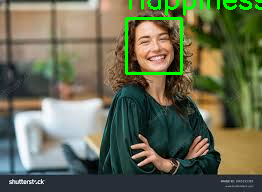

In [51]:
# To use with an image file:
detect_and_classify_emotion(image_path='/image_h.jpg')